<a href="https://colab.research.google.com/github/hs884062/HimanshuSinghMse2AI/blob/main/HimanshuSinghAI_MSE_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

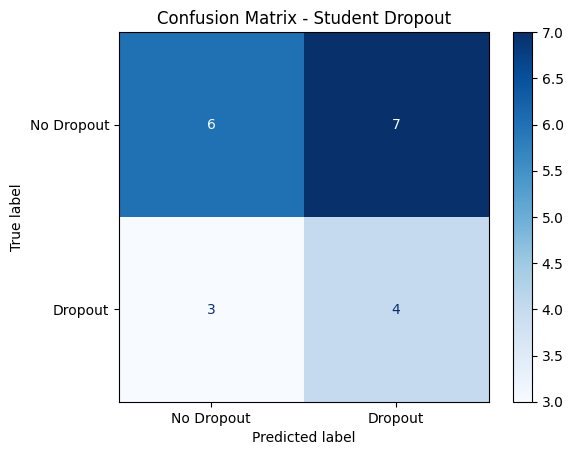

              precision    recall  f1-score   support

  No Dropout       0.67      0.46      0.55        13
     Dropout       0.36      0.57      0.44         7

    accuracy                           0.50        20
   macro avg       0.52      0.52      0.49        20
weighted avg       0.56      0.50      0.51        20


--- Predict Dropout Risk for a New Student ---
Enter attendance (0-100): 100
Enter grades (0.0 - 10.0): 10
Enter class participation score (0-10): 10
Prediction: Low risk of dropout


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Load dataset
df = pd.read_csv("student_dropout.csv")

# Encode the target label 'dropout_risk' (yes -> 1, no -> 0)
le = LabelEncoder()
df['dropout_risk'] = le.fit_transform(df['dropout_risk'])

# Split the data into features (X) and target (y)
X = df.drop('dropout_risk', axis=1)
y = df['dropout_risk']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['No Dropout', 'Dropout'])

# Display the confusion matrix as a heatmap
cmd.plot(cmap='Blues')
plt.title("Confusion Matrix - Student Dropout")
plt.show()

# Print classification metrics: accuracy, precision, recall, f1-score
print(classification_report(y_test, y_pred, target_names=['No Dropout', 'Dropout']))

# Take input from user and predict dropout risk
print("\n--- Predict Dropout Risk for a New Student ---")
attendance = int(input("Enter attendance (0-100): "))
grades = float(input("Enter grades (0.0 - 10.0): "))
participation = int(input("Enter class participation score (0-10): "))

# Create DataFrame for user input
user_data = pd.DataFrame([[attendance, grades, participation]], columns=['attendance', 'grades', 'participation'])

# Make prediction
prediction = model.predict(user_data)[0]

# Show result
if prediction == 1:
    print("Prediction: High risk of dropout")
else:
    print("Prediction: Low risk of dropout")
